In [2]:
%matplotlib inline
import os
import sys
import pandas as pd
avRep = "data/reputation.data"
av = pd.read_csv(avRep, sep="#", header=None)

av.columns = ["IP","Reliability","Risk","Type","Country",
              "Locale","Coords","x"]
#print(av) # take a quick look at the data structure
av.head().to_csv(sys.stdout)

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11


In [3]:
from IPython.display import HTML 
HTML(av.head(10).to_html())

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
6,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12


In [4]:
av['Reliability'].describe()

count    258626.000000
mean          2.798040
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [5]:
av['Risk'].describe()

count    258626.000000
mean          2.221362
std           0.531571
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

In [6]:
def factor_col(col):
    factor = pd.Categorical.from_array(col)
    return pd.value_counts(factor,sort=True).reindex(factor.categories)

rel_ct = pd.value_counts(av['Reliability'])
risk_ct = pd.value_counts(av['Risk'])
type_ct = pd.value_counts(av['Type'])
country_ct = pd.value_counts(av['Country'])

print (factor_col(av['Reliability']))
print (factor_col(av['Risk']))
print (factor_col(av['Type']).head(n=10))
print (factor_col(av['Country']).head(n=10))

1       5612
2     149117
3      10892
4      87040
5          7
6       4758
7        297
8         21
9        686
10       196
dtype: int64
1        39
2    213852
3     33719
4      9588
5      1328
6        90
7        10
dtype: int64
APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
dtype: int64
A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
dtype: int64


C:\Users\wnz9u\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


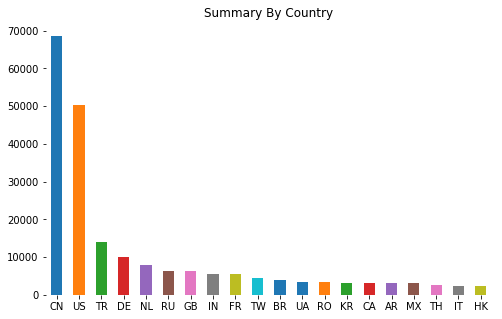

In [7]:
# Listing 3-14
# require object: av (3-5)
# See corresponding output in Figure 3-5
# NOTE: Notice the significant differnce in the Python graph in that the 
#       blank/empty country code entries are not in the graph
# need some functions from matplotlib to help reduce 'chart junk'
import matplotlib.pyplot as plt

# sort by country
country_ct = pd.value_counts(av['Country'])

# plot the data
# reduce chart junk
plt.axes(frameon=0)
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Country", figsize=(8,5)).grid(False)



C:\Users\wnz9u\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


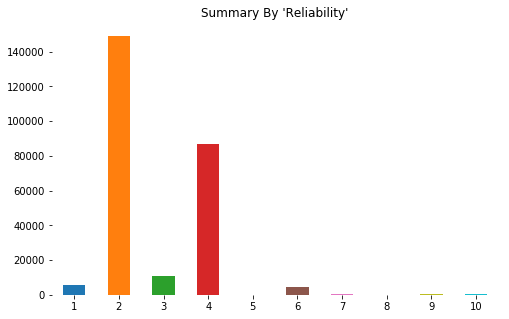

In [8]:
# Listing 3-15
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-6
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Reliability']).plot(kind='bar', rot=0,
           title="Summary By 'Reliability'", figsize=(8,5)).grid(False)


C:\Users\wnz9u\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


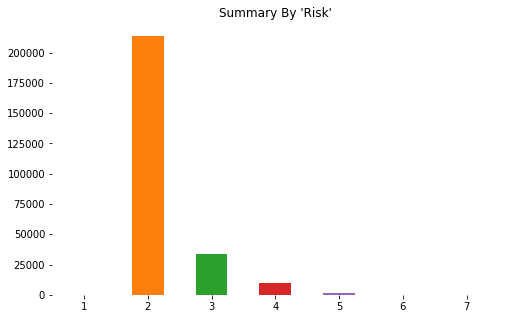

In [9]:

# Listing 3-16
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-7
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Risk']).plot(kind='bar', rot=0, 
           title="Summary By 'Risk'", figsize=(8,5)).grid(False)

In [10]:
top10 = pd.value_counts(av['Country'])[0:9]
top10.astype(float) / len (av['Country'])

CN    0.265182
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024332
IN    0.021189
FR    0.021069
Name: Country, dtype: float64

Reliability    1       2     3      4   5     6    7   8    9   10
Risk                                                              
1               0       0    16      7   0     8    8   0    0   0
2             804  149114  3670  57653   4  2084   85  11  345  82
3            2225       3  6668  22168   2  2151  156   7  260  79
4            2129       0   481   6447   0   404   43   2   58  24
5             432       0    55    700   1   103    5   1   20  11
6              19       0     2     60   0     8    0   0    1   0
7               3       0     0      5   0     0    0   0    2   0


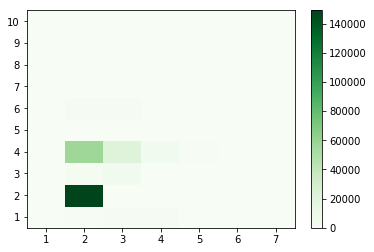

In [11]:
from matplotlib import cm
from numpy import arange

print(pd.crosstab(av['Risk'], av['Reliability']).to_string())
## Reliability    1       2     3      4   5     6    7   8    9   10
## Risk                                                              
## 1               0       0    16      7   0     8    8   0    0   0
## 2             804  149114  3670  57653   4  2084   85  11  345  82
## 3            2225       3  6668  22168   2  2151  156   7  260  79
## 4            2129       0   481   6447   0   404   43   2   58  24
## 5             432       0    55    700   1   103    5   1   20  11
## 6              19       0     2     60   0     8    0   0    1   0
## 7               3       0     0      5   0     0    0   0    2   0


# graphical view of contingency table (swapping risk/reliability)
xtab = pd.crosstab(av['Reliability'], av['Risk'])
plt.pcolor(xtab,cmap=cm.Greens)
plt.yticks(arange(0.5,len(xtab.index), 1),xtab.index)
plt.xticks(arange(0.5,len(xtab.columns), 1),xtab.columns)
plt.colorbar()



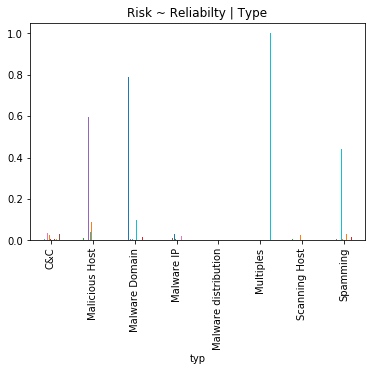

In [57]:
# Listing 3-23
# require object: av (3-5)
# See corresponding output in Figure 3-9
# compute contingency table for Risk/Reliability factors which 
# produces a matrix of counts of rows that have attributes at

# create new column as a copy of Type column
av['newtype'] = av['Type']

# replace multi-Type entries with “Multiples”
av[av['newtype'].str.contains(";")] = "Multiples"

# setup new crosstab structures
typ = av['newtype']
rel = av['Reliability'].apply(str)
rsk = av['Risk'].apply(str)

# compute crosstab making it split on the
# new “type” column
xtab = pd.crosstab(typ, [ rel, rsk ], 
          rownames=['typ'], colnames=['rel', 'rsk'],normalize =0)


# the following print statement will show a huge text
# representation of the contingency table. The output
# is too large for the book, but is worth looking at 
# as you run through the exercise to see how useful 
# visualizations can be over raw text/numeric output
#print (xtab.to_string()) #output not shown

xtab.plot(kind='bar',legend=False,
   title="Risk ~ Reliabilty | Type").grid(False)